In [1]:
import pandas as pd
import numpy as np
import os
import sys
import shutil
import matplotlib.pyplot as plt

In [2]:
time_data_pt_1_gpu = pd.read_csv('Results/PT/1 GPU/training_time_pt_1gpu.csv')
time_data_pt_2_gpu = pd.read_csv('Results/PT/2 GPU/training_time_pt_2gpus.csv')
time_data_pt_4_gpu = pd.read_csv('Results/PT/4 GPU/training_time_pt_4gpus.csv')
time_data_pt_8_gpu = pd.read_csv('Results/PT/8 GPU/training_time_pt_8gpus.csv')

In [3]:
time_data_tf_1_gpu = pd.read_csv('Results/TF/data/validation_acc_1_gpus.csv')
time_data_tf_2_gpu = pd.read_csv('Results/TF/data/validation_acc_2_gpus.csv')
time_data_tf_4_gpu = pd.read_csv('Results/TF/data/validation_acc_4_gpus.csv')
time_data_tf_8_gpu = pd.read_csv('Results/TF/data/validation_acc_8_gpus.csv')

In [6]:
def get_total_time_tf(data):
    times = data['Wall time'].values
    end_time = times[-1]
    start_time = times[4]
    total_time = end_time - start_time
    return total_time

In [7]:
def get_total_time(data):
    end_time = data['epoch_end_time'].values[-1]
    start_time = data['epoch_start_time'].values[5]
    total_time = end_time - start_time
    return total_time

In [8]:
pt_1_gpu_total_time = get_total_time(time_data_pt_1_gpu)
pt_2_gpu_total_time = get_total_time(time_data_pt_2_gpu)
pt_4_gpu_total_time = get_total_time(time_data_pt_4_gpu)
pt_8_gpu_total_time = get_total_time(time_data_pt_8_gpu)

In [9]:
tf_1_gpu_total_time = get_total_time_tf(time_data_tf_1_gpu)
tf_2_gpu_total_time = get_total_time_tf(time_data_tf_2_gpu)
tf_4_gpu_total_time = get_total_time_tf(time_data_tf_4_gpu)
tf_8_gpu_total_time = get_total_time_tf(time_data_tf_8_gpu)

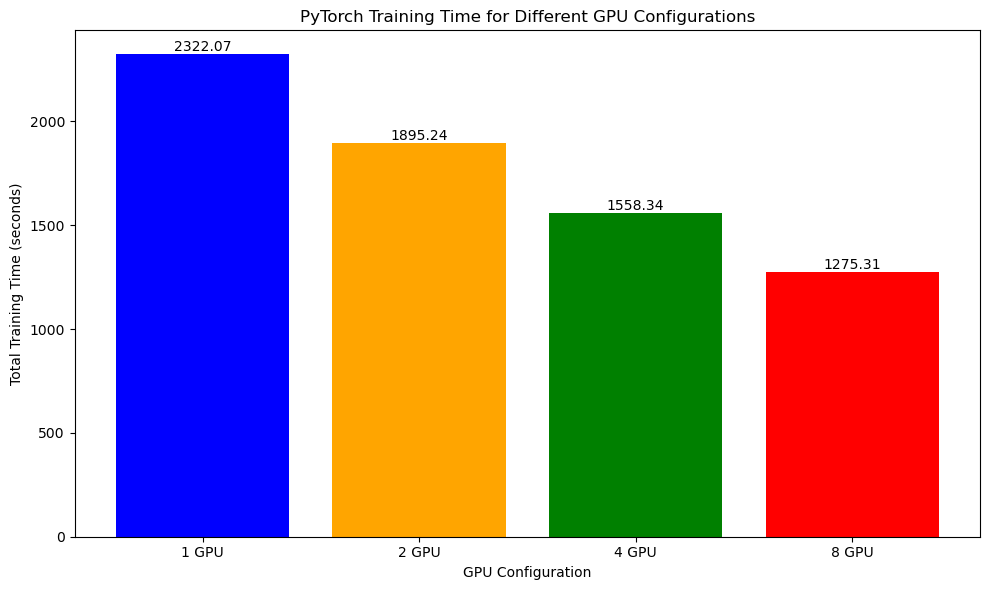

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(['1 GPU', '2 GPU', '4 GPU', '8 GPU'], [pt_1_gpu_total_time, pt_2_gpu_total_time, pt_4_gpu_total_time, pt_8_gpu_total_time], color=['blue', 'orange', 'green', 'red'])
plt.title('PyTorch Training Time for Different GPU Configurations')
plt.xlabel('GPU Configuration')
plt.ylabel('Total Training Time (seconds)')
plt.xticks(rotation=0)
plt.tight_layout()
for i, v in enumerate([pt_1_gpu_total_time, pt_2_gpu_total_time, pt_4_gpu_total_time, pt_8_gpu_total_time]):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom')

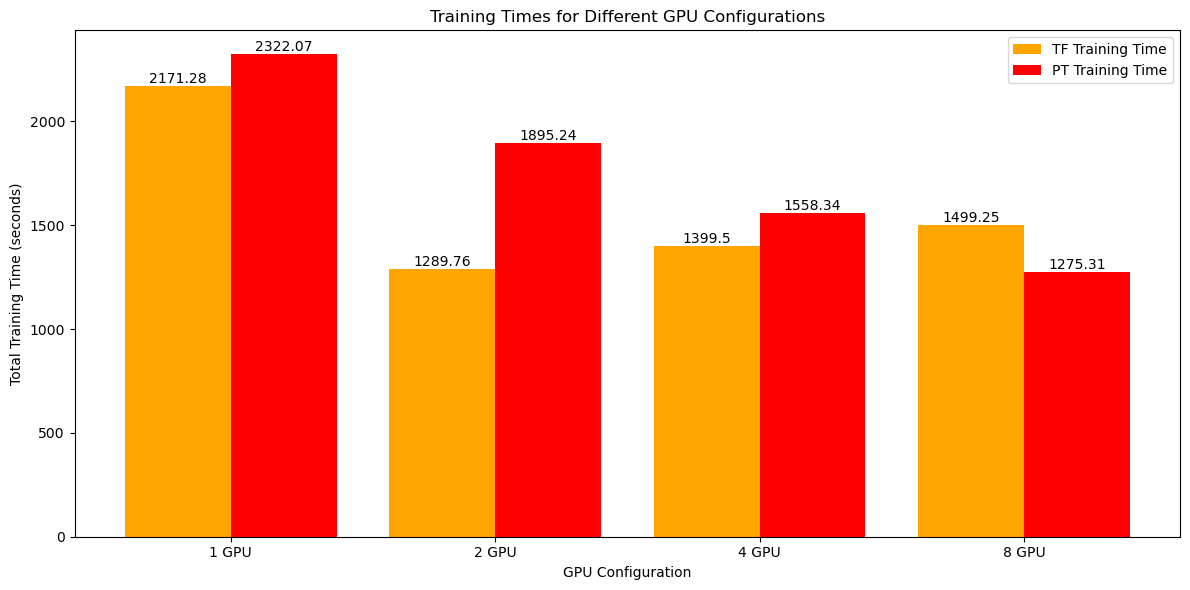

In [ ]:
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = np.arange(4)
plt.bar(x - (bar_width / 2), [tf_1_gpu_total_time, tf_2_gpu_total_time, tf_4_gpu_total_time, tf_8_gpu_total_time], width=bar_width, label='TF Training Time', color='orange')
plt.bar(x + (bar_width / 2), [pt_1_gpu_total_time, pt_2_gpu_total_time, pt_4_gpu_total_time, pt_8_gpu_total_time], width=bar_width, label='PT Training Time', color='red')
plt.title('Training Times for Different GPU Configurations')
plt.xlabel('GPU Configuration')
plt.ylabel('Total Training Time (seconds)')
plt.xticks(x, ['1 GPU', '2 GPU', '4 GPU', '8 GPU'])
plt.legend()
plt.tight_layout()
for i, v in enumerate([tf_1_gpu_total_time, tf_2_gpu_total_time, tf_4_gpu_total_time, tf_8_gpu_total_time]):
    plt.text(i - (bar_width / 2), v + 0.5, str(round(v, 2)), ha='center', va='bottom')
for i, v in enumerate([pt_1_gpu_total_time, pt_2_gpu_total_time, pt_4_gpu_total_time, pt_8_gpu_total_time]):
    plt.text(i + (bar_width / 2), v + 0.5, str(round(v, 2)), ha='center', va='bottom')


In [13]:
total_images = (120587+30234) * 10

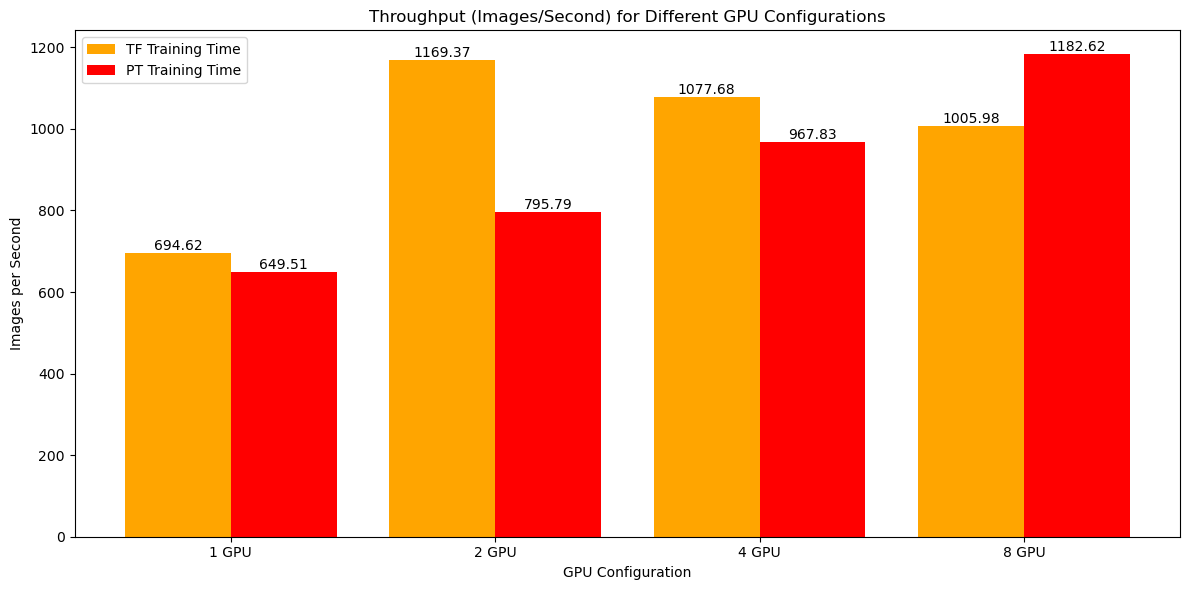

In [ ]:
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = np.arange(4)  
plt.bar(x - (bar_width / 2), [total_images/tf_1_gpu_total_time, total_images/tf_2_gpu_total_time, total_images/tf_4_gpu_total_time, total_images/tf_8_gpu_total_time], width=bar_width, label='TF Training Time', color='orange')
plt.bar(x + (bar_width / 2), [total_images/pt_1_gpu_total_time, total_images/pt_2_gpu_total_time, total_images/pt_4_gpu_total_time, total_images/pt_8_gpu_total_time], width=bar_width, label='PT Training Time', color='red')
plt.title('Throughput (Images/Second) for Different GPU Configurations')
plt.xlabel('GPU Configuration')
plt.ylabel('Images per Second')
plt.xticks(x, ['1 GPU', '2 GPU', '4 GPU', '8 GPU'])
plt.legend()
plt.tight_layout()
for i, v in enumerate([total_images/tf_1_gpu_total_time, total_images/tf_2_gpu_total_time, total_images/tf_4_gpu_total_time, total_images/tf_8_gpu_total_time]):
    plt.text(i - (bar_width / 2), v + 0.5, str(round(v, 2)), ha='center', va='bottom')
for i, v in enumerate([total_images/pt_1_gpu_total_time, total_images/pt_2_gpu_total_time, total_images/pt_4_gpu_total_time, total_images/pt_8_gpu_total_time]):
    plt.text(i + (bar_width / 2), v + 0.5, str(round(v, 2)), ha='center', va='bottom')

In [ ]:
tf_1_gpu_throughput = total_images/tf_1_gpu_total_time
tf_2_gpu_throughput = total_images/tf_2_gpu_total_time
tf_4_gpu_throughput = total_images/tf_4_gpu_total_time
tf_8_gpu_throughput = total_images/tf_8_gpu_total_time

pt_1_gpu_throughput = total_images/pt_1_gpu_total_time
pt_2_gpu_throughput = total_images/pt_2_gpu_total_time
pt_4_gpu_throughput = total_images/pt_4_gpu_total_time
pt_8_gpu_throughput = total_images/pt_8_gpu_total_time

In [16]:
tf_2_gpu_comm_overhead = (1 - ((tf_2_gpu_throughput / 2) / tf_1_gpu_throughput)) * 100
tf_4_gpu_comm_overhead = (1 - ((tf_4_gpu_throughput / 4) / tf_1_gpu_throughput)) * 100
tf_8_gpu_comm_overhead = (1 - ((tf_8_gpu_throughput / 8) / tf_1_gpu_throughput)) * 100

pt_2_gpu_comm_overhead = (1 - ((pt_2_gpu_throughput / 2) / pt_1_gpu_throughput)) * 100
pt_4_gpu_comm_overhead = (1 - ((pt_4_gpu_throughput / 4) / pt_1_gpu_throughput)) * 100
pt_8_gpu_comm_overhead = (1 - ((pt_8_gpu_throughput / 8) / pt_1_gpu_throughput)) * 100

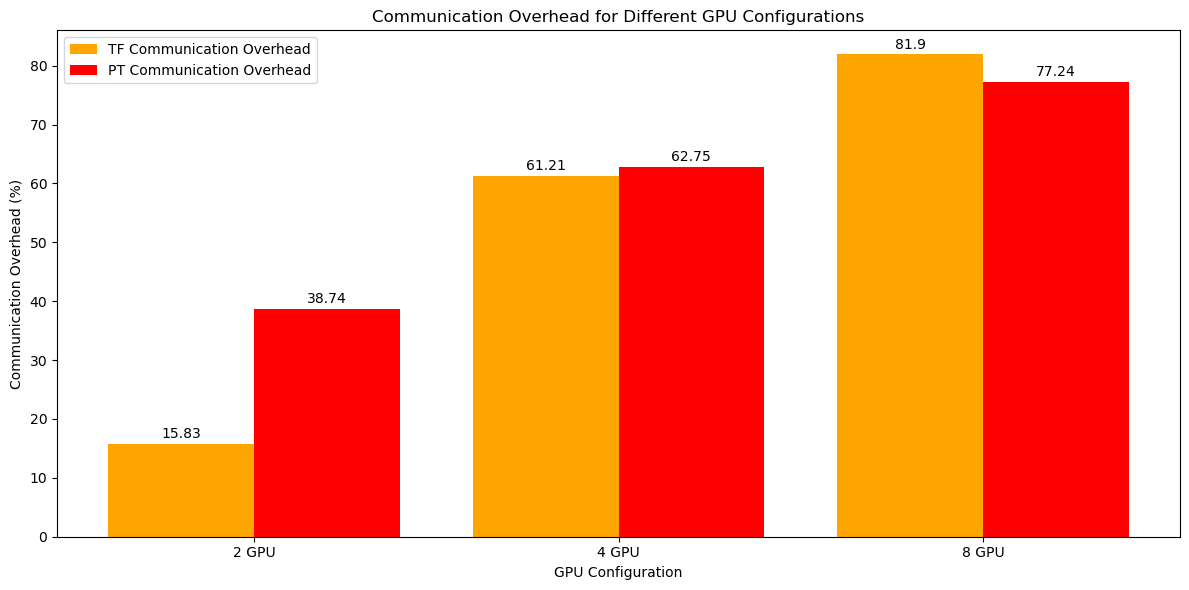

In [ ]:
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = np.arange(3)
plt.bar(x - (bar_width / 2), [tf_2_gpu_comm_overhead, tf_4_gpu_comm_overhead, tf_8_gpu_comm_overhead], width=bar_width, label='TF Communication Overhead', color='orange')
plt.bar(x + (bar_width / 2), [pt_2_gpu_comm_overhead, pt_4_gpu_comm_overhead, pt_8_gpu_comm_overhead], width=bar_width, label='PT Communication Overhead', color='red')
plt.title('Communication Overhead for Different GPU Configurations')
plt.xlabel('GPU Configuration')
plt.ylabel('Communication Overhead (%)')
plt.xticks(x, ['2 GPU', '4 GPU', '8 GPU'])
plt.legend()
plt.tight_layout()
for i, v in enumerate([tf_2_gpu_comm_overhead, tf_4_gpu_comm_overhead, tf_8_gpu_comm_overhead]):
    plt.text(i - (bar_width / 2), v + 0.5, str(round(v, 2)), ha='center', va='bottom')
for i, v in enumerate([pt_2_gpu_comm_overhead, pt_4_gpu_comm_overhead, pt_8_gpu_comm_overhead]):
    plt.text(i + (bar_width / 2), v + 0.5, str(round(v, 2)), ha='center', va='bottom')

In [18]:
def get_epoch_total_time(data):
    end_times = data['epoch_end_time'].values
    start_times = data['epoch_start_time'].values
    total_times = end_times - start_times
    return total_times

In [19]:
pt_1_gpu_epoch_times = get_epoch_total_time(time_data_pt_1_gpu)
pt_2_gpu_epoch_times = get_epoch_total_time(time_data_pt_2_gpu)
pt_4_gpu_epoch_times = get_epoch_total_time(time_data_pt_4_gpu)
pt_8_gpu_epoch_times = get_epoch_total_time(time_data_pt_8_gpu)

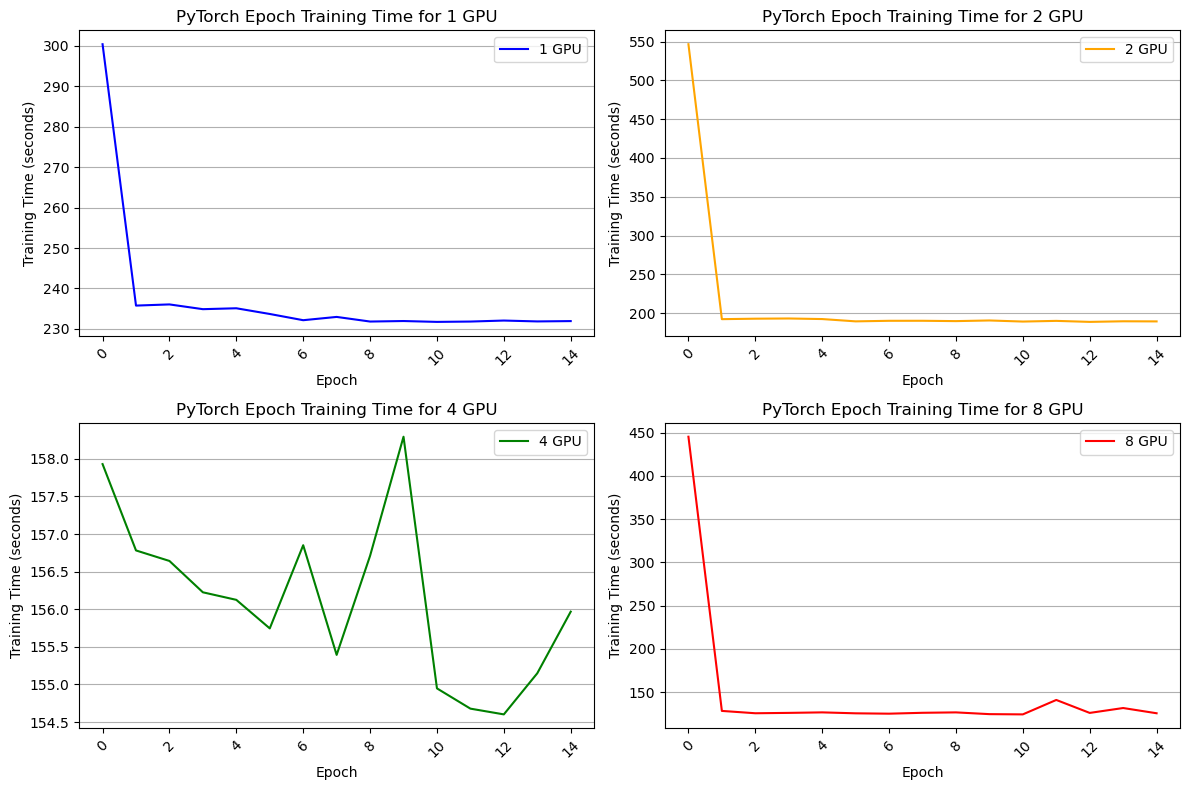

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(pt_1_gpu_epoch_times, label='1 GPU', color='blue')
plt.title('PyTorch Epoch Training Time for 1 GPU')
plt.xlabel('Epoch')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(pt_2_gpu_epoch_times, label='2 GPU', color='orange')
plt.title('PyTorch Epoch Training Time for 2 GPU')
plt.xlabel('Epoch')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(pt_4_gpu_epoch_times, label='4 GPU', color='green')
plt.title('PyTorch Epoch Training Time for 4 GPU')
plt.xlabel('Epoch')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(pt_8_gpu_epoch_times, label='8 GPU', color='red')
plt.title('PyTorch Epoch Training Time for 8 GPU')
plt.xlabel('Epoch')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

In [21]:
def remove_brackets(string):
    return string.replace('[','').replace(']','').replace('\'', '').replace('\"', '')

In [22]:
def split_string(string):
    return string.split(',')

In [23]:
def clean_array_string(array_string):
    array_string = remove_brackets(array_string)
    array_string = split_string(array_string)
    array_string = [float(i) for i in array_string]
    return array_string

In [24]:
def compute_average_time_difference(start_column, end_column):
    start_times = start_column.values
    end_times = end_column.values
    start_times = [clean_array_string(i) for i in start_times]
    end_times = [clean_array_string(i) for i in end_times]
    start_times = start_times[4:]
    end_times = end_times[4:]
    time_differences = [np.mean(np.array(end_times[i]) - np.array(start_times[i])) for i in range(len(start_times))]
    return time_differences
    

In [26]:
pt_1_gpu_to_device_time = compute_average_time_difference(time_data_pt_1_gpu['training_to_device_start_time'], time_data_pt_1_gpu['training_to_device_end_time'])
pt_1_gpu_to_device_time = np.mean(pt_1_gpu_to_device_time)

pt_1_gpu_forward_time = compute_average_time_difference(time_data_pt_1_gpu['training_forward_start_time'], time_data_pt_1_gpu['training_forward_end_time'])
pt_1_gpu_forward_time = np.mean(pt_1_gpu_forward_time)

pt_1_gpu_backward_time = compute_average_time_difference(time_data_pt_1_gpu['training_backward_start_time'], time_data_pt_1_gpu['training_backward_end_time'])
pt_1_gpu_backward_time = np.mean(pt_1_gpu_backward_time)


In [27]:
pt_2_gpu_to_device_time = compute_average_time_difference(time_data_pt_2_gpu['training_to_device_start_time'], time_data_pt_2_gpu['training_to_device_end_time'])
pt_2_gpu_to_device_time = np.mean(pt_2_gpu_to_device_time)

pt_2_gpu_forward_time = compute_average_time_difference(time_data_pt_2_gpu['training_forward_start_time'], time_data_pt_2_gpu['training_forward_end_time'])
pt_2_gpu_forward_time = np.mean(pt_2_gpu_forward_time)

pt_2_gpu_backward_time = compute_average_time_difference(time_data_pt_2_gpu['training_backward_start_time'], time_data_pt_2_gpu['training_backward_end_time'])
pt_2_gpu_backward_time = np.mean(pt_2_gpu_backward_time)

pt_4_gpu_to_device_time = compute_average_time_difference(time_data_pt_4_gpu['training_to_device_start_time'], time_data_pt_4_gpu['training_to_device_end_time'])
pt_4_gpu_to_device_time = np.mean(pt_4_gpu_to_device_time)

pt_4_gpu_forward_time = compute_average_time_difference(time_data_pt_4_gpu['training_forward_start_time'], time_data_pt_4_gpu['training_forward_end_time'])
pt_4_gpu_forward_time = np.mean(pt_4_gpu_forward_time)

pt_4_gpu_backward_time = compute_average_time_difference(time_data_pt_4_gpu['training_backward_start_time'], time_data_pt_4_gpu['training_backward_end_time'])
pt_4_gpu_backward_time = np.mean(pt_4_gpu_backward_time)

pt_8_gpu_to_device_time = compute_average_time_difference(time_data_pt_8_gpu['training_to_device_start_time'], time_data_pt_8_gpu['training_to_device_end_time'])
pt_8_gpu_to_device_time = np.mean(pt_8_gpu_to_device_time)
pt_8_gpu_forward_time = compute_average_time_difference(time_data_pt_8_gpu['training_forward_start_time'], time_data_pt_8_gpu['training_forward_end_time'])
pt_8_gpu_forward_time = np.mean(pt_8_gpu_forward_time)

pt_8_gpu_backward_time = compute_average_time_difference(time_data_pt_8_gpu['training_backward_start_time'], time_data_pt_8_gpu['training_backward_end_time'])
pt_8_gpu_backward_time = np.mean(pt_8_gpu_backward_time)

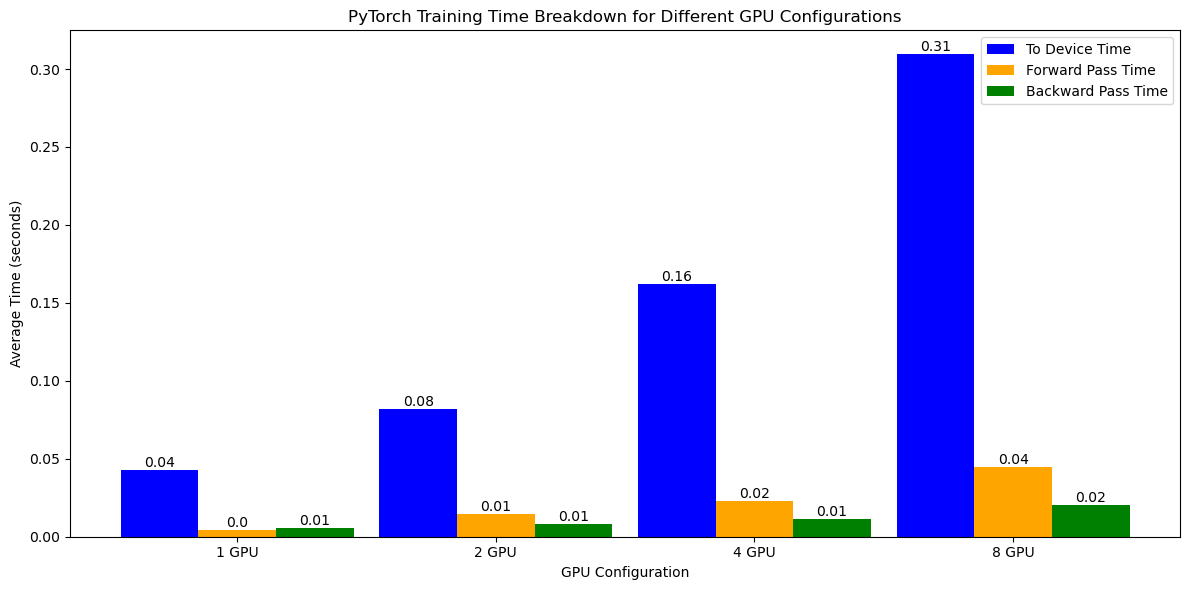

In [ ]:
plt.figure(figsize=(12, 6))
bar_width = 0.3
x = np.arange(4)
plt.bar(x - bar_width, [pt_1_gpu_to_device_time, pt_2_gpu_to_device_time, pt_4_gpu_to_device_time, pt_8_gpu_to_device_time], width=bar_width, label='To Device Time', color='blue')
plt.bar(x, [pt_1_gpu_forward_time, pt_2_gpu_forward_time, pt_4_gpu_forward_time, pt_8_gpu_forward_time], width=bar_width, label='Forward Pass Time', color='orange')
plt.bar(x + bar_width, [pt_1_gpu_backward_time, pt_2_gpu_backward_time, pt_4_gpu_backward_time, pt_8_gpu_backward_time], width=bar_width, label='Backward Pass Time', color='green')
plt.title('PyTorch Training Time Breakdown for Different GPU Configurations')
plt.xlabel('GPU Configuration')
plt.ylabel('Average Time (seconds)')
plt.xticks(x, ['1 GPU', '2 GPU', '4 GPU', '8 GPU'])
plt.legend()
plt.tight_layout()
for i, v in enumerate([pt_1_gpu_to_device_time, pt_2_gpu_to_device_time, pt_4_gpu_to_device_time, pt_8_gpu_to_device_time]):
    plt.text(i - bar_width, v, str(round(v, 2)), ha='center', va='bottom')
for i, v in enumerate([pt_1_gpu_forward_time, pt_2_gpu_forward_time, pt_4_gpu_forward_time, pt_8_gpu_forward_time]):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
for i, v in enumerate([pt_1_gpu_backward_time, pt_2_gpu_backward_time, pt_4_gpu_backward_time, pt_8_gpu_backward_time]):
    plt.text(i + bar_width, v, str(round(v, 2)), ha='center', va='bottom')

In [29]:
time_data_pt_8_gpu_opt = pd.read_csv('Results/PT/8 GPU/training_time_pt_8gpus_opt.csv')

In [30]:
pt_8_gpu_to_device_time_opt = compute_average_time_difference(time_data_pt_8_gpu_opt['training_to_device_start_time'], time_data_pt_8_gpu_opt['training_to_device_end_time'])
pt_8_gpu_to_device_time_opt = np.mean(pt_8_gpu_to_device_time_opt)
pt_8_gpu_forward_time_opt = compute_average_time_difference(time_data_pt_8_gpu_opt['training_forward_start_time'], time_data_pt_8_gpu_opt['training_forward_end_time'])
pt_8_gpu_forward_time_opt = np.mean(pt_8_gpu_forward_time_opt)
pt_8_gpu_backward_time_opt = compute_average_time_difference(time_data_pt_8_gpu_opt['training_backward_start_time'], time_data_pt_8_gpu_opt['training_backward_end_time'])
pt_8_gpu_backward_time_opt = np.mean(pt_8_gpu_backward_time_opt)

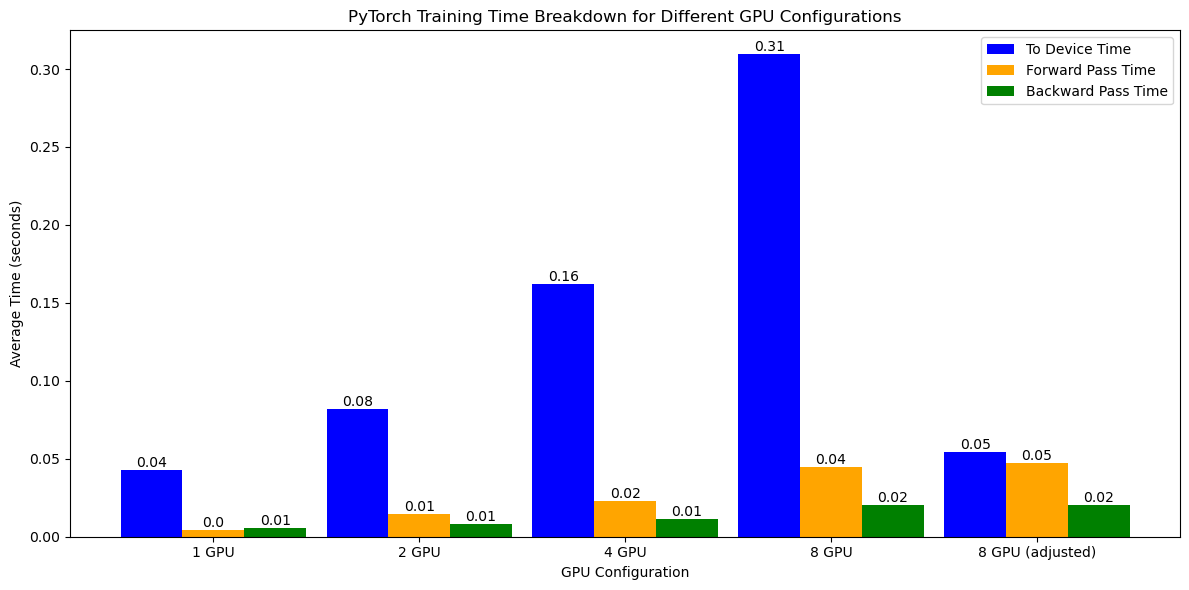

In [ ]:
plt.figure(figsize=(12, 6))
bar_width = 0.3
x = np.arange(5)
plt.bar(x - bar_width, [pt_1_gpu_to_device_time, pt_2_gpu_to_device_time, pt_4_gpu_to_device_time, pt_8_gpu_to_device_time, pt_8_gpu_to_device_time_opt], width=bar_width, label='To Device Time', color='blue')
plt.bar(x, [pt_1_gpu_forward_time, pt_2_gpu_forward_time, pt_4_gpu_forward_time, pt_8_gpu_forward_time, pt_8_gpu_forward_time_opt], width=bar_width, label='Forward Pass Time', color='orange')
plt.bar(x + bar_width, [pt_1_gpu_backward_time, pt_2_gpu_backward_time, pt_4_gpu_backward_time, pt_8_gpu_backward_time, pt_8_gpu_backward_time_opt], width=bar_width, label='Backward Pass Time', color='green')
plt.title('PyTorch Training Time Breakdown for Different GPU Configurations')
plt.xlabel('GPU Configuration')
plt.ylabel('Average Time (seconds)')
plt.xticks(x, ['1 GPU', '2 GPU', '4 GPU', '8 GPU', '8 GPU (adjusted)'])
plt.legend()
plt.tight_layout()
for i, v in enumerate([pt_1_gpu_to_device_time, pt_2_gpu_to_device_time, pt_4_gpu_to_device_time, pt_8_gpu_to_device_time, pt_8_gpu_to_device_time_opt]):
    plt.text(i - bar_width, v, str(round(v, 2)), ha='center', va='bottom')
for i, v in enumerate([pt_1_gpu_forward_time, pt_2_gpu_forward_time, pt_4_gpu_forward_time, pt_8_gpu_forward_time, pt_8_gpu_forward_time_opt]):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
for i, v in enumerate([pt_1_gpu_backward_time, pt_2_gpu_backward_time, pt_4_gpu_backward_time, pt_8_gpu_backward_time, pt_8_gpu_backward_time_opt]):
    plt.text(i + bar_width, v, str(round(v, 2)), ha='center', va='bottom')

In [32]:
pt_8_gpu_total_time_opt = get_total_time(time_data_pt_8_gpu_opt)

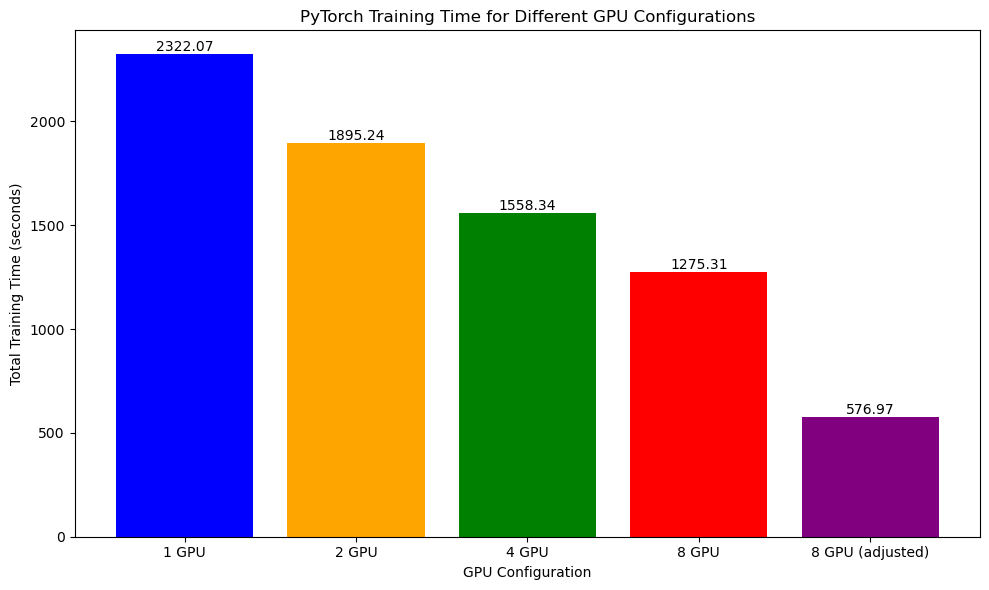

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(['1 GPU', '2 GPU', '4 GPU', '8 GPU', '8 GPU (adjusted)'], [pt_1_gpu_total_time, pt_2_gpu_total_time, pt_4_gpu_total_time, pt_8_gpu_total_time, pt_8_gpu_total_time_opt], color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('PyTorch Training Time for Different GPU Configurations')
plt.xlabel('GPU Configuration')
plt.ylabel('Total Training Time (seconds)')
plt.xticks(rotation=0)
plt.tight_layout()
for i, v in enumerate([pt_1_gpu_total_time, pt_2_gpu_total_time, pt_4_gpu_total_time, pt_8_gpu_total_time, pt_8_gpu_total_time_opt]):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom')

In [34]:
pt_8_gpu_throughput_opt = total_images/pt_8_gpu_total_time_opt

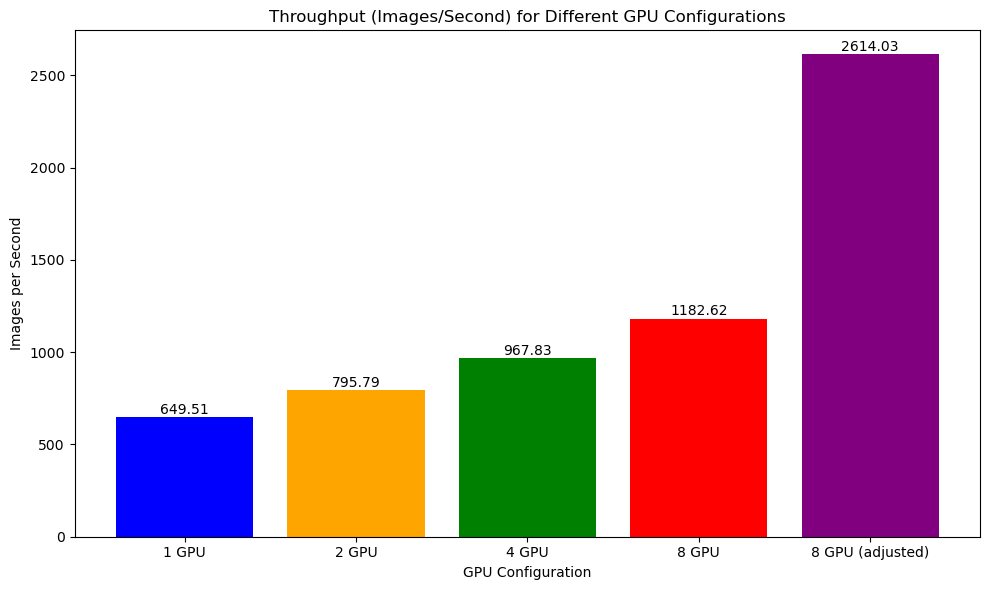

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(['1 GPU', '2 GPU', '4 GPU', '8 GPU', '8 GPU (adjusted)'], [total_images/pt_1_gpu_total_time, total_images/pt_2_gpu_total_time, total_images/pt_4_gpu_total_time, total_images/pt_8_gpu_total_time, pt_8_gpu_throughput_opt], color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Throughput (Images/Second) for Different GPU Configurations')
plt.xlabel('GPU Configuration')
plt.ylabel('Images per Second')
plt.xticks(rotation=0)
plt.tight_layout()
for i, v in enumerate([total_images/pt_1_gpu_total_time, total_images/pt_2_gpu_total_time, total_images/pt_4_gpu_total_time, total_images/pt_8_gpu_total_time, pt_8_gpu_throughput_opt]):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom')


In [36]:
pt_8_gpu_opt_comm_overhead = (1 - ((pt_8_gpu_throughput_opt / 8) / pt_1_gpu_throughput)) * 100

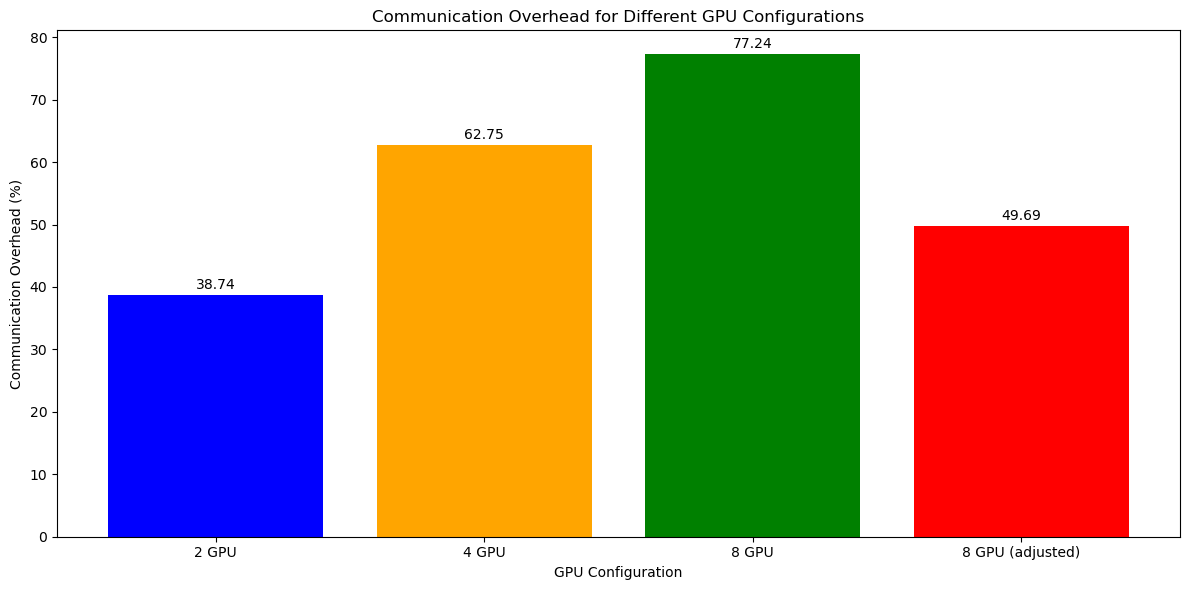

In [ ]:
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = np.arange(4)
plt.bar(['2 GPU', '4 GPU', '8 GPU', '8 GPU (adjusted)'], [pt_2_gpu_comm_overhead, pt_4_gpu_comm_overhead, pt_8_gpu_comm_overhead, pt_8_gpu_opt_comm_overhead], color=['blue', 'orange', 'green', 'red'])
plt.title('Communication Overhead for Different GPU Configurations')
plt.xlabel('GPU Configuration')
plt.ylabel('Communication Overhead (%)')
plt.xticks(rotation=0)
plt.tight_layout()
for i, v in enumerate([pt_2_gpu_comm_overhead, pt_4_gpu_comm_overhead, pt_8_gpu_comm_overhead, pt_8_gpu_opt_comm_overhead]):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom')
    